<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9614715	total: 52.6ms	remaining: 52.6s
1:	learn: 0.9295402	total: 53ms	remaining: 26.4s
2:	learn: 0.9024130	total: 53.4ms	remaining: 17.7s
3:	learn: 0.8719828	total: 54ms	remaining: 13.4s
4:	learn: 0.8473184	total: 54.3ms	remaining: 10.8s
5:	learn: 0.8198452	total: 54.9ms	remaining: 9.09s
6:	learn: 0.7974713	total: 55.3ms	remaining: 7.84s
7:	learn: 0.7746478	total: 55.8ms	remaining: 6.92s
8:	learn: 0.7492278	total: 56.3ms	remaining: 6.2s
9:	learn: 0.7279104	total: 56.8ms	remaining: 5.62s
10:	learn: 0.7051070	total: 57.3ms	remaining: 5.16s
11:	learn: 0.6823910	total: 57.8ms	remaining: 4.76s
12:	learn: 0.6610925	total: 58.3ms	remaining: 4.43s
13:	learn: 0.6411270	total: 59.8ms	remaining: 4.21s
14:	learn: 0.6211331	total: 60.2ms	remaining: 3.95s
15:	learn: 0.6030724	total: 60.7ms	remaining: 3.73s
16:	learn: 0.5843618	total: 61.4ms	remaining: 3.55s
17:	learn: 0.5674904	total: 61.9ms	remaining: 3.37s
18:	learn: 0.5509581	total: 62.4ms	remaining: 3.2

19:	learn: 0.5343913	total: 63.4ms	remaining: 3.11s
20:	learn: 0.5191233	total: 64.1ms	remaining: 2.99s
21:	learn: 0.5041949	total: 64.7ms	remaining: 2.88s
22:	learn: 0.4891453	total: 65.7ms	remaining: 2.79s
23:	learn: 0.4736559	total: 66.1ms	remaining: 2.69s
24:	learn: 0.4601878	total: 66.5ms	remaining: 2.6s
25:	learn: 0.4455842	total: 66.9ms	remaining: 2.5s
26:	learn: 0.4318291	total: 69.1ms	remaining: 2.49s
27:	learn: 0.4201113	total: 69.5ms	remaining: 2.41s
28:	learn: 0.4074254	total: 71.5ms	remaining: 2.39s
29:	learn: 0.3958666	total: 71.9ms	remaining: 2.33s
30:	learn: 0.3840257	total: 72.6ms	remaining: 2.27s
31:	learn: 0.3719695	total: 73.2ms	remaining: 2.21s
32:	learn: 0.3618137	total: 73.8ms	remaining: 2.16s
33:	learn: 0.3514909	total: 74.4ms	remaining: 2.11s
34:	learn: 0.3406858	total: 75ms	remaining: 2.07s
35:	learn: 0.3320421	total: 75.5ms	remaining: 2.02s
36:	learn: 0.3227622	total: 76ms	remaining: 1.98s
37:	learn: 0.3145527	total: 76.5ms	remaining: 1.94s
38:	learn: 0.30597

196:	learn: 0.0439473	total: 153ms	remaining: 623ms
197:	learn: 0.0438513	total: 156ms	remaining: 631ms
198:	learn: 0.0437640	total: 156ms	remaining: 629ms
199:	learn: 0.0436548	total: 157ms	remaining: 626ms
200:	learn: 0.0435163	total: 157ms	remaining: 623ms
201:	learn: 0.0434561	total: 157ms	remaining: 620ms
202:	learn: 0.0433536	total: 157ms	remaining: 617ms
203:	learn: 0.0432726	total: 158ms	remaining: 615ms
204:	learn: 0.0431013	total: 158ms	remaining: 613ms
205:	learn: 0.0430411	total: 158ms	remaining: 610ms
206:	learn: 0.0428965	total: 158ms	remaining: 607ms
207:	learn: 0.0428022	total: 159ms	remaining: 605ms
208:	learn: 0.0427299	total: 159ms	remaining: 602ms
209:	learn: 0.0425782	total: 159ms	remaining: 599ms
210:	learn: 0.0424594	total: 160ms	remaining: 597ms
211:	learn: 0.0422991	total: 160ms	remaining: 594ms
212:	learn: 0.0422288	total: 160ms	remaining: 593ms
213:	learn: 0.0421173	total: 161ms	remaining: 590ms
214:	learn: 0.0420123	total: 161ms	remaining: 588ms
215:	learn: 

301:	learn: 0.0333172	total: 206ms	remaining: 476ms
302:	learn: 0.0331977	total: 206ms	remaining: 474ms
303:	learn: 0.0331106	total: 206ms	remaining: 473ms
304:	learn: 0.0330253	total: 207ms	remaining: 471ms
305:	learn: 0.0329428	total: 207ms	remaining: 469ms
306:	learn: 0.0329135	total: 207ms	remaining: 468ms
307:	learn: 0.0328172	total: 207ms	remaining: 466ms
308:	learn: 0.0327194	total: 208ms	remaining: 465ms
309:	learn: 0.0326625	total: 208ms	remaining: 463ms
310:	learn: 0.0325681	total: 209ms	remaining: 463ms
311:	learn: 0.0324324	total: 209ms	remaining: 462ms
312:	learn: 0.0323367	total: 211ms	remaining: 463ms
313:	learn: 0.0322586	total: 211ms	remaining: 461ms
314:	learn: 0.0322219	total: 211ms	remaining: 460ms
315:	learn: 0.0321763	total: 212ms	remaining: 458ms
316:	learn: 0.0320891	total: 212ms	remaining: 457ms
317:	learn: 0.0320072	total: 212ms	remaining: 455ms
318:	learn: 0.0319770	total: 213ms	remaining: 454ms
319:	learn: 0.0319380	total: 213ms	remaining: 452ms
320:	learn: 

464:	learn: 0.0247093	total: 284ms	remaining: 327ms
465:	learn: 0.0246578	total: 285ms	remaining: 326ms
466:	learn: 0.0246347	total: 285ms	remaining: 325ms
467:	learn: 0.0246268	total: 288ms	remaining: 328ms
468:	learn: 0.0245736	total: 289ms	remaining: 327ms
469:	learn: 0.0245169	total: 289ms	remaining: 326ms
470:	learn: 0.0244954	total: 290ms	remaining: 325ms
471:	learn: 0.0244413	total: 290ms	remaining: 324ms
472:	learn: 0.0244265	total: 290ms	remaining: 323ms
473:	learn: 0.0243858	total: 290ms	remaining: 322ms
474:	learn: 0.0243634	total: 291ms	remaining: 321ms
475:	learn: 0.0243467	total: 291ms	remaining: 320ms
476:	learn: 0.0242960	total: 291ms	remaining: 319ms
477:	learn: 0.0242466	total: 295ms	remaining: 322ms
478:	learn: 0.0242151	total: 296ms	remaining: 322ms
479:	learn: 0.0241777	total: 297ms	remaining: 322ms
480:	learn: 0.0241536	total: 298ms	remaining: 321ms
481:	learn: 0.0240819	total: 298ms	remaining: 321ms
482:	learn: 0.0240586	total: 299ms	remaining: 320ms
483:	learn: 

556:	learn: 0.0220548	total: 337ms	remaining: 268ms
557:	learn: 0.0220418	total: 338ms	remaining: 267ms
558:	learn: 0.0220321	total: 338ms	remaining: 267ms
559:	learn: 0.0220202	total: 338ms	remaining: 266ms
560:	learn: 0.0219779	total: 338ms	remaining: 265ms
561:	learn: 0.0219595	total: 339ms	remaining: 264ms
562:	learn: 0.0219156	total: 339ms	remaining: 263ms
563:	learn: 0.0218981	total: 339ms	remaining: 262ms
564:	learn: 0.0218570	total: 340ms	remaining: 262ms
565:	learn: 0.0218171	total: 340ms	remaining: 261ms
566:	learn: 0.0218028	total: 341ms	remaining: 260ms
567:	learn: 0.0217624	total: 341ms	remaining: 259ms
568:	learn: 0.0217502	total: 341ms	remaining: 259ms
569:	learn: 0.0217112	total: 342ms	remaining: 258ms
570:	learn: 0.0216714	total: 342ms	remaining: 257ms
571:	learn: 0.0216467	total: 342ms	remaining: 256ms
572:	learn: 0.0216335	total: 343ms	remaining: 255ms
573:	learn: 0.0216157	total: 343ms	remaining: 254ms
574:	learn: 0.0216033	total: 343ms	remaining: 254ms
575:	learn: 

750:	learn: 0.0179177	total: 423ms	remaining: 140ms
751:	learn: 0.0178974	total: 423ms	remaining: 140ms
752:	learn: 0.0178865	total: 426ms	remaining: 140ms
753:	learn: 0.0178701	total: 427ms	remaining: 139ms
754:	learn: 0.0178605	total: 434ms	remaining: 141ms
755:	learn: 0.0178532	total: 435ms	remaining: 140ms
756:	learn: 0.0178223	total: 437ms	remaining: 140ms
757:	learn: 0.0178025	total: 437ms	remaining: 140ms
758:	learn: 0.0177818	total: 437ms	remaining: 139ms
759:	learn: 0.0177477	total: 438ms	remaining: 138ms
760:	learn: 0.0177283	total: 438ms	remaining: 137ms
761:	learn: 0.0177089	total: 438ms	remaining: 137ms
762:	learn: 0.0176905	total: 438ms	remaining: 136ms
763:	learn: 0.0176771	total: 439ms	remaining: 135ms
764:	learn: 0.0176589	total: 439ms	remaining: 135ms
765:	learn: 0.0176350	total: 440ms	remaining: 134ms
766:	learn: 0.0176151	total: 440ms	remaining: 134ms
767:	learn: 0.0175924	total: 440ms	remaining: 133ms
768:	learn: 0.0175731	total: 441ms	remaining: 132ms
769:	learn: 

818:	learn: 0.0167688	total: 470ms	remaining: 104ms
819:	learn: 0.0167516	total: 470ms	remaining: 103ms
820:	learn: 0.0167427	total: 471ms	remaining: 103ms
821:	learn: 0.0167374	total: 471ms	remaining: 102ms
822:	learn: 0.0167198	total: 471ms	remaining: 101ms
823:	learn: 0.0167147	total: 472ms	remaining: 101ms
824:	learn: 0.0166979	total: 472ms	remaining: 100ms
825:	learn: 0.0166708	total: 472ms	remaining: 99.5ms
826:	learn: 0.0166312	total: 473ms	remaining: 98.8ms
827:	learn: 0.0165990	total: 473ms	remaining: 98.3ms
828:	learn: 0.0165780	total: 474ms	remaining: 97.7ms
829:	learn: 0.0165592	total: 474ms	remaining: 97.1ms
830:	learn: 0.0165462	total: 474ms	remaining: 96.4ms
831:	learn: 0.0165360	total: 475ms	remaining: 95.9ms
832:	learn: 0.0165266	total: 475ms	remaining: 95.2ms
833:	learn: 0.0165150	total: 475ms	remaining: 94.6ms
834:	learn: 0.0165010	total: 476ms	remaining: 94ms
835:	learn: 0.0164952	total: 476ms	remaining: 93.4ms
836:	learn: 0.0164833	total: 476ms	remaining: 92.7ms
83

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.020314060421239857
ABC Pre-generator MAE 0.8008193007922808


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

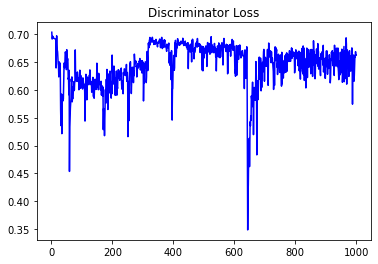

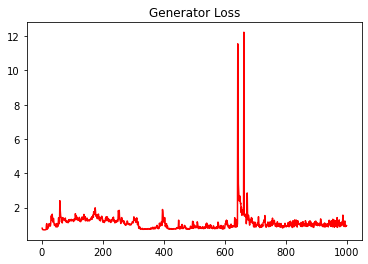

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.05544098644904405


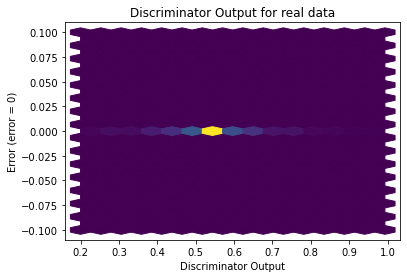

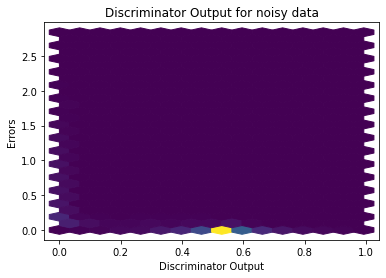

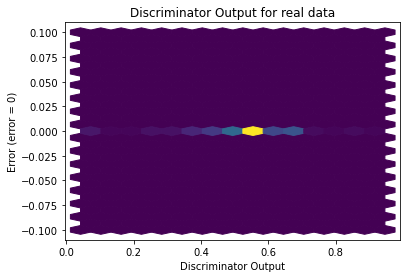

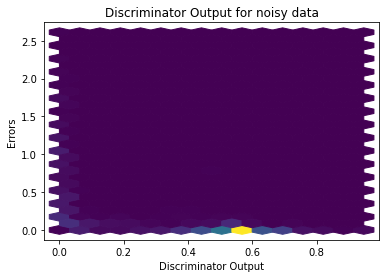

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())